In [1]:
import pandas as pd
import math

In [2]:
df = pd.read_excel("exams.xlsx")

In [3]:
df

,Matr.Nr.,Name,Studienkennzahl
0,a123,A,99
1,e234,B,55
2,f345,C,77
3,a456,D,22
4,m567,E,99
5,n789,F,44


## Raumzuweisung

In [4]:
def room_for_matr_nr(matr_nr):
    if int(matr_nr[1:]) % 2 == 0:
        return 'A'
    else:
        return 'B'

df['Raum'] = [room_for_matr_nr(matr_nr) for matr_nr in df['Matr.Nr.']]
df

,Matr.Nr.,Name,Studienkennzahl,Raum
0,a123,A,99,B
1,e234,B,55,A
2,f345,C,77,B
3,a456,D,22,A
4,m567,E,99,B
5,n789,F,44,B


## Noten

In [5]:
GRADES_MAIL = """n789: 4
e234: 1
m567: 5
f345: 4
a456: 3
"""

In [6]:
lines = GRADES_MAIL.splitlines()
lines

['n789: 4', 'e234: 1', 'm567: 5', 'f345: 4', 'a456: 3']

In [7]:
lines_pairs = [line.split(":") for line in lines]
lines_pairs

[['n789', ' 4'],
 ['e234', ' 1'],
 ['m567', ' 5'],
 ['f345', ' 4'],
 ['a456', ' 3']]

In [8]:
grades_dict = {matr_nr: int(note) for (matr_nr, note) in lines_pairs}
grades_dict

{'n789': 4, 'e234': 1, 'm567': 5, 'f345': 4, 'a456': 3}

In [9]:
df['Note'] = [ grades_dict.get(matr_nr, math.nan) for matr_nr in df['Matr.Nr.']]
df

,Matr.Nr.,Name,Studienkennzahl,Raum,Note
0,a123,A,99,B,NaN
1,e234,B,55,A,1.0
2,f345,C,77,B,4.0
3,a456,D,22,A,3.0
4,m567,E,99,B,5.0
5,n789,F,44,B,4.0


In [10]:
df_index = df.set_index("Matr.Nr.")
df_index

,Name,Studienkennzahl,Raum,Note
Matr.Nr.,,,,
a123,A,99,B,NaN
e234,B,55,A,1.0
f345,C,77,B,4.0
a456,D,22,A,3.0
m567,E,99,B,5.0
n789,F,44,B,4.0


In [11]:
for matr_nr, note in lines_pairs:
    df_index.loc[matr_nr, 'Note'] = int(note)

In [12]:
df_index

,Name,Studienkennzahl,Raum,Note
Matr.Nr.,,,,
a123,A,99,B,NaN
e234,B,55,A,1.0
f345,C,77,B,4.0
a456,D,22,A,3.0
m567,E,99,B,5.0
n789,F,44,B,4.0


## Einser zählen

In [13]:
df[ df['Note'] == 1 ]

,Matr.Nr.,Name,Studienkennzahl,Raum,Note
1,e234,B,55,A,1.0


In [14]:
df[ df['Raum'] == 'A' ]

,Matr.Nr.,Name,Studienkennzahl,Raum,Note
1,e234,B,55,A,1.0
3,a456,D,22,A,3.0


In [15]:
len(df[ (df['Note'] == 1) & (df['Raum'] == 'A')  ])

1

In [16]:
len(df[ (df['Note'] == 1) & (df['Raum'] == 'B')  ])

0

In [17]:
{
    room: len(df[ (df['Note'] == 1) & (df['Raum'] == room) ])
    for room in df['Raum'].unique()
}

{'B': 0, 'A': 1}

array([<AxesSubplot:title={'center':'A'}>,
       <AxesSubplot:title={'center':'B'}>], dtype=object)

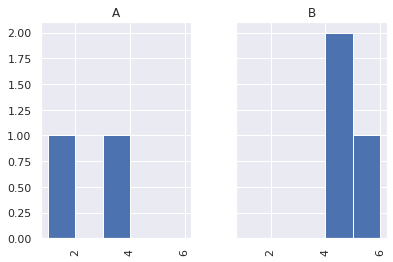

In [18]:
import seaborn
seaborn.set()

df.hist(
    column="Note",
    bins=[1,2,3,4,5,6],
    sharey=True,
    by="Raum",
)

## Bestanden

In [25]:
df['Bestanden'] = df['Note'] < 5

In [26]:
df

,Matr.Nr.,Name,Studienkennzahl,Raum,Note,Bestanden
0,a123,A,99,B,NaN,False
1,e234,B,55,A,1.0,True
2,f345,C,77,B,4.0,True
3,a456,D,22,A,3.0,True
4,m567,E,99,B,5.0,False
5,n789,F,44,B,4.0,True


## Nächstes Semester

In [52]:
new_registrations = pd.read_excel("new_registrations.xlsx")
new_registrations

,Matr.Nr.
0,e234
1,m567
2,x789


In [31]:
bestanden = df[ df['Bestanden'] ]['Matr.Nr.']

In [32]:
bestanden

1    e234
2    f345
3    a456
5    n789
Name: Matr.Nr., dtype: object

In [39]:
bestanden.index

Int64Index([1, 2, 3, 5], dtype='int64')

In [40]:
bestanden.values

array(['e234', 'f345', 'a456', 'n789'], dtype=object)

In [54]:
new_registrations['zugelassen'] = [ (matr_nr in bestanden.values) for matr_nr in new_registrations['Matr.Nr.'] ]

In [55]:
new_registrations

,Matr.Nr.,zugelassen
0,e234,True
1,m567,False
2,x789,False


In [56]:
[ matr_nr for matr_nr in new_registrations['Matr.Nr.'] if (matr_nr in bestanden.values) ]

['e234']

In [57]:
[ (matr_nr in bestanden.values) for matr_nr in new_registrations['Matr.Nr.'] ]

[True, False, False]

In [58]:
new_registrations['Matr.Nr.'].isin( ['e234'] )

0     True
1    False
2    False
Name: Matr.Nr., dtype: bool

In [65]:
from pathlib import Path

In [73]:
Path("exams.xlsx").suffix

'.xlsx'

In [74]:
[p for p in Path().iterdir() if p.name.startswith("exams") and p.suffix == ".xlsx"]

[PosixPath('exams.xlsx'), PosixPath('exams_2.xlsx')]

In [81]:
previous_exams = [p for p in Path().rglob("exams_*.xlsx")]
previous_exams

[PosixPath('exams_1.xlsx'), PosixPath('exams_2.xlsx')]

In [96]:
bestanden_alle = []
for previous_exam in previous_exams:
    df_1 = pd.read_excel(previous_exam)
    bestanden = df_1[ df_1['Bestanden'] ]['Matr.Nr.'].values
    bestanden_alle.extend(bestanden)
bestanden_alle

['e234', 'f345', 'a456', 'n789', 'x789', 'x567']

In [99]:
new_registrations['zugelassen'] = [ (matr_nr in bestanden_alle) for matr_nr in new_registrations['Matr.Nr.'] ]
new_registrations

,Matr.Nr.,zugelassen
0,e234,True
1,m567,False
2,x789,True


## Übung

In [102]:
uebung = pd.read_excel("uebung.xlsx")
uebung

,Matr.Nr.,T1,T2,T3
0,a123,1.0,3,2.0
1,b543,5.0,4,3.0
2,x567,NaN,1,NaN


In [114]:
def check_bestanden(row):
    grade_sum = row['T1'] + row['T2'] + row['T3']
    antritte = 3 - [row['T1'], row['T2'], row['T3']].count(0)
    average = grade_sum / antritte
       
    bestanden = (average <= 3) and (antritte >= 2)
    return bestanden
    
    
uebung['Bestanden'] = uebung.fillna(0).apply(check_bestanden, axis="columns")
uebung

,Matr.Nr.,T1,T2,T3,Bestanden
0,a123,1.0,3,2.0,True
1,b543,5.0,4,3.0,False
2,x567,NaN,1,NaN,False


In [104]:
uebung[["T1", "T2", "T3"]]

,T1,T2,T3
0,1.0,3,2.0
1,5.0,4,3.0
2,NaN,1,NaN


In [107]:
uebung.fillna(0)

,Matr.Nr.,T1,T2,T3
0,a123,1.0,3,2.0
1,b543,5.0,4,3.0
2,x567,0.0,1,0.0


2

In [134]:
data = pd.DataFrame({"value": [4,5,6,4,3,4,5,20,5,3,4,6,-7]})

In [135]:
data

,value
0,4
1,5
2,6
3,4
4,3
5,4
6,5
7,20
8,5
9,3


In [136]:
from scipy.stats import zscore

In [137]:
(zscore(data['value']) >= 2) | (zscore(data['value']) <= -2)

array([False, False, False, False, False, False, False,  True, False,
       False, False, False,  True])

In [138]:
import numpy as np


In [149]:
data = pd.DataFrame({"value": [4,5,6,4,3,4,5,20,5,3,4,6,-7]})
data

,value
0,4
1,5
2,6
3,4
4,3
5,4
6,5
7,20
8,5
9,3


In [150]:
def remove_outlier(data):
    indices_outliers = np.abs(zscore(data['value'])) >= 2
    count_outliers = len(data[indices_outliers])
    print("removing", count_outliers, "outliers")
    data.drop(index=data.index[ indices_outliers ], inplace=True)

In [153]:
data

,value
0,4
1,5
2,6
3,4
4,3
5,4
6,5
8,5
9,3
10,4


In [152]:
remove_outlier(data)

removing 2 outliers


In [158]:
df.loc[2:4]

,Matr.Nr.,Name,Studienkennzahl,Raum,Note,Bestanden
2,f345,C,77,B,4.0,True
3,a456,D,22,A,3.0,True
4,m567,E,99,B,5.0,False


In [160]:
df.loc[:, "Name":"Raum"]

,Name,Studienkennzahl,Raum
0,A,99,B
1,B,55,A
2,C,77,B
3,D,22,A
4,E,99,B
5,F,44,B


In [162]:
df.loc[2:4, ["Name","Raum"] ]

,Name,Raum
2,C,B
3,D,A
4,E,B


In [164]:
df['Note'].mean()

3.4

In [166]:
df = pd.read_excel("process.xlsx")
df

,Prozess,Maschinentyp,Temperatur,Parameter1,Parameter2,Ausbeute,Fehlerquote
0,A,X2,22.00,4,2,0.90,0.005
1,B,X2,23.20,4,1,0.85,NaN
2,C,X3,23.15,7,3,0.98,0.002
3,D,X3,23.40,4,4,0.91,0.009


In [169]:
df[ ["Parameter1", "Parameter2"] ].mean(axis='columns')

0    3.0
1    2.5
2    5.0
3    4.0
dtype: float64

In [171]:
def ausbeute_qualitativ(ausbeute):
    if ausbeute > 0.95:
        return "hoch"
    elif ausbeute > 0.9:
        return "mittel"
    else:
        return "niedrig"
    
df['Ausbeute_qualitativ'] = df['Ausbeute'].apply(ausbeute_qualitativ)
df

,Prozess,Maschinentyp,Temperatur,Parameter1,Parameter2,Ausbeute,Fehlerquote,Ausbeute_qualitativ
0,A,X2,22.00,4,2,0.90,0.005,niedrig
1,B,X2,23.20,4,1,0.85,NaN,niedrig
2,C,X3,23.15,7,3,0.98,0.002,hoch
3,D,X3,23.40,4,4,0.91,0.009,mittel


In [173]:
df_log = pd.DataFrame({"value": [1,2,0, 2]})

In [175]:
np.log(df_log['value'])

/home/mallinger/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    0.000000
1    0.693147
2        -inf
3    0.693147
Name: value, dtype: float64

In [178]:
def apply_if_not_zero(val):
    if val != 0:
        return np.log(val)
    else:
        return 0
df_log['value'].apply(apply_if_not_zero)

0    0.000000
1    0.693147
2    0.000000
3    0.693147
Name: value, dtype: float64

In [186]:
nonzeros = df_log['value'] != 0 
df_log.loc[nonzeros, 'value'] = np.log(df_log.loc[nonzeros, 'value'])

In [187]:
df_log

,value
0,0.000000
1,0.693147
2,0.000000
3,0.693147


In [194]:
def expand_matr(row):
    univ = row['Matr.Nr.'][0]
    matr = int(row['Matr.Nr.'][1:])
    return [univ, matr]
    
new_registrations.apply(expand_matr, axis='columns', result_type="expand").rename(columns={0: "Univ", 1: "Matr.Nr."})

,Univ,Matr.Nr.
0,e,234
1,m,567
2,x,789


In [206]:
for row in df.itertuples():
    print("\n\nseries:")
    print(row.Prozess)



series:
A


series:
B


series:
C


series:
D


In [204]:
(1,2,3)

(1, 2, 3)